从 MongoDB 加载数据到 pandas

In [97]:
# 加这行不需要再写plt.show()，直接显示图像出来
%matplotlib inline 

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

display_columns = ["title","read_num","like_num","comment_num","reward_num","p_date", "content_url"]

In [98]:
import pymongo
from pymongo import MongoClient
# 连接 mongodb
c = MongoClient()
cursor = c.weixin3['post'].find()
df = pd.DataFrame(list(cursor))

# 删除 "_id"列
df = df.drop("_id", axis=1)
# 重新设置列的顺序
df = df.reindex(columns=display_columns)
# 将p_date的数据类型从timestamp 转换成 datetime
df.p_date = pd.to_datetime(df['p_date'])
df.head()

,title,read_num,like_num,comment_num,reward_num,p_date,content_url
0,2017年，感谢你们，2018年，我们继续努力前行,1363,42,0,2,2018-01-01 16:44:53,http://mp.weixin.qq.com/s?__biz=MjM5MzgyODQxMQ...
1,2018许愿墙,663,4,0,0,2018-01-01 16:44:53,http://mp.weixin.qq.com/s?__biz=MjM5MzgyODQxMQ...
2,2018 年，学点人工智能（赠书8本）,5839,135,0,45,2017-12-29 08:00:00,http://mp.weixin.qq.com/s?__biz=MjM5MzgyODQxMQ...
3,5个酷毙的Python工具,7407,39,0,0,2017-12-27 08:00:00,http://mp.weixin.qq.com/s?__biz=MjM5MzgyODQxMQ...
4,Python语言的2017年终总结,6993,51,0,1,2017-12-25 08:24:12,http://mp.weixin.qq.com/s?__biz=MjM5MzgyODQxMQ...


In [99]:
# 从csv文件中加载
df = pd.read_csv("post.csv")
# 重新设置列的顺序
df = df.reindex(columns=display_columns)
# 将p_date的数据类型从timestamp 转换成 datetime
df.p_date = pd.to_datetime(df['p_date'])
df.head()

,title,read_num,like_num,comment_num,reward_num,p_date,content_url
0,为什么我推荐你学习数据分析,3549,22,0,0,2018-01-15 19:59:14,http://mp.weixin.qq.com/s?__biz=MjM5MzgyODQxMQ...
1,推荐几个公众号（文末彩蛋）,4866,37,0,0,2018-01-12 12:13:55,http://mp.weixin.qq.com/s?__biz=MjM5MzgyODQxMQ...
2,普通程序员的逆袭：如何学习数据挖掘与人工智能,3582,14,0,0,2018-01-11 21:06:24,http://mp.weixin.qq.com/s?__biz=MjM5MzgyODQxMQ...
3,这10个题，有 68% 的人答不对,3643,49,0,1,2018-01-10 07:31:18,http://mp.weixin.qq.com/s?__biz=MjM5MzgyODQxMQ...
4,Python知识冲顶大会,5308,30,0,0,2018-01-08 08:00:00,http://mp.weixin.qq.com/s?__biz=MjM5MzgyODQxMQ...


In [100]:
# 数据概览
df.describe()

,read_num,like_num,comment_num,reward_num
count,203.000000,203.000000,203.0,203.000000
mean,2404.694581,31.891626,0.0,2.551724
std,2005.320602,31.026467,0.0,7.322895
min,124.000000,0.000000,0.0,0.000000
25%,1032.500000,8.500000,0.0,0.000000
50%,1844.000000,25.000000,0.0,0.000000
75%,3498.000000,43.500000,0.0,3.000000
max,8628.000000,190.000000,0.0,83.000000


获取阅读量最高的10篇文章

In [101]:
# 根据阅读数排序，ascending 表示降序排列
top_read_num_10 = df.sort_values(by=['read_num'], ascending=False)[:10]
top_read_num_10 = top_read_num_10[display_columns]
# 重置行索引，drop 表示删除原来的行索引
top_read_num_10.reset_index(drop=True)

,title,read_num,like_num,comment_num,reward_num,p_date,content_url
0,微软考虑将 Python 作为 Excel 官方脚本语言,8628,66,0,0,2017-12-17 16:57:23,http://mp.weixin.qq.com/s?__biz=MjM5MzgyODQxMQ...
1,5个酷毙的Python工具,8443,39,0,0,2017-12-27 08:00:00,http://mp.weixin.qq.com/s?__biz=MjM5MzgyODQxMQ...
2,Python是怎么火起来的,8423,67,0,3,2017-06-30 07:54:56,http://mp.weixin.qq.com/s?__biz=MjM5MzgyODQxMQ...
3,Python爬虫知识点梳理,8370,128,0,5,2017-09-20 18:12:54,http://mp.weixin.qq.com/s?__biz=MjM5MzgyODQxMQ...
4,如何快速入门Python,8132,123,0,13,2017-06-05 08:47:48,http://mp.weixin.qq.com/s?__biz=MjM5MzgyODQxMQ...
5,最新技能 get：用 AI 玩微信跳一跳，自动刷分可破 10000 分,8078,75,0,0,2018-01-05 16:30:00,http://mp.weixin.qq.com/s?__biz=MjM5MzgyODQxMQ...
6,推荐几个公众号,7726,105,0,7,2017-11-12 14:55:30,http://mp.weixin.qq.com/s?__biz=MjM5MzgyODQxMQ...
7,Python语言的2017年终总结,7446,56,0,1,2017-12-25 08:24:12,http://mp.weixin.qq.com/s?__biz=MjM5MzgyODQxMQ...
8,10行代码爬取微信公众号文章评论,7125,62,0,3,2017-07-30 21:49:18,http://mp.weixin.qq.com/s?__biz=MjM5MzgyODQxMQ...
9,零基础如何自学Python,6811,124,0,6,2017-12-15 07:50:00,http://mp.weixin.qq.com/s?__biz=MjM5MzgyODQxMQ...


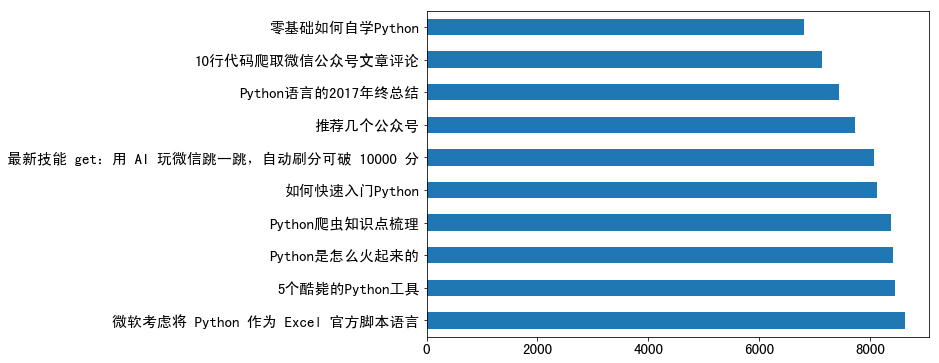

In [102]:
ax = top_read_num_10.plot(x='title', y='read_num', kind='barh', figsize=(9,6), fontsize=15)
ax.set_ylabel("")
ax.set_xlabel("")
ax.legend().set_visible(False)


In [103]:
历史文章阅读量曲线

NameError: name '历史文章阅读量曲线' is not defined

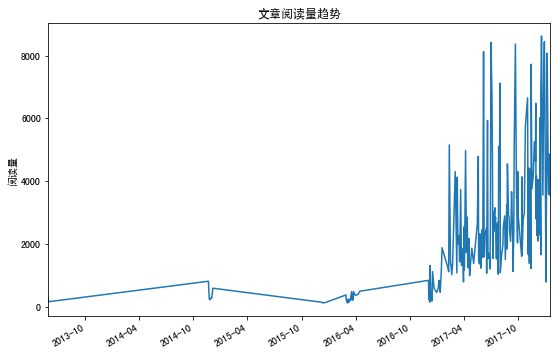

In [104]:
ax = df.plot(y='read_num', x='p_date', title="文章阅读量趋势",figsize=(9,6))
# 设置y轴标签
ax.set_ylabel("阅读量")
# 设置x轴标签
ax.set_xlabel("")
# 设置图例（就是用来说明这根线用来表示什么）
# ax.legend(["阅读数"]);
# 隐藏图例
ax.legend().set_visible(False)
# 隐藏x轴
# ax.get_xaxis().set_visible(False)
# 隐藏y轴
# ax.get_yaxis().set_visible(False)

按年分组统计每年写文章的数量

In [106]:
# 按年分组
year_df = df.groupby(df.p_date.dt.year).size().reset_index(name='total') 
year_df

,p_date,total
0,2013,2
1,2014,6
2,2015,3
3,2016,34
4,2017,149
5,2018,9


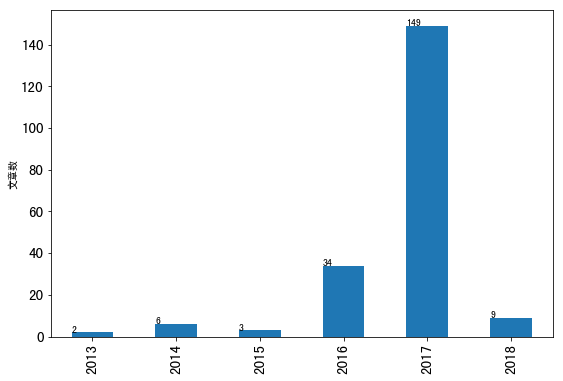

In [107]:
ax = year_df.plot(x='p_date', y='total', kind='bar', figsize=(9,6), fontsize=15)
ax.set_ylabel("文章数")
ax.set_xlabel("")
ax.legend().set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))

被赞赏的文章

In [108]:
# 过滤赞赏数大于0的数据
reward_count = len(df[df.reward_num>0])
reward_count

101

In [109]:
reward_count/len(df)

0.4975369458128079

In [110]:
# 总共收到518次赞赏
total = df['reward_num'].sum()
total

518

In [111]:
top_reward_num = df.sort_values(by=['reward_num'], ascending=False)[:10]
top_reward_num = top_reward_num[display_columns]
top_reward_num = top_reward_num.reset_index(drop=True)
top_reward_num

,title,read_num,like_num,comment_num,reward_num,p_date,content_url
0,自学Python编程怎么学才不那么孤独,5763,100,0,83,2017-10-24 08:36:40,http://mp.weixin.qq.com/s?__biz=MjM5MzgyODQxMQ...
1,2018 年，学点人工智能（赠书8本）,6353,137,0,45,2017-12-29 08:00:00,http://mp.weixin.qq.com/s?__biz=MjM5MzgyODQxMQ...
2,【福利】写在5000订阅读者时,1246,58,0,34,2017-04-14 18:24:18,http://mp.weixin.qq.com/s?__biz=MjM5MzgyODQxMQ...
3,11月赠书，总共10本，附Python书单,6485,190,0,16,2017-11-28 08:00:00,http://mp.weixin.qq.com/s?__biz=MjM5MzgyODQxMQ...
4,如何快速入门Python,8132,123,0,13,2017-06-05 08:47:48,http://mp.weixin.qq.com/s?__biz=MjM5MzgyODQxMQ...
5,[荐书|福利] 如何系统学习网络爬虫,4305,76,0,10,2017-09-28 17:16:31,http://mp.weixin.qq.com/s?__biz=MjM5MzgyODQxMQ...
6,2017半年文章合集（建议收藏）,3031,37,0,10,2017-07-09 09:25:45,http://mp.weixin.qq.com/s?__biz=MjM5MzgyODQxMQ...
7,初级Python程序员如何进阶？,4798,115,0,10,2017-05-18 17:09:30,http://mp.weixin.qq.com/s?__biz=MjM5MzgyODQxMQ...
8,2017年3月写字总结,1286,52,0,9,2017-04-02 01:35:01,http://mp.weixin.qq.com/s?__biz=MjM5MzgyODQxMQ...
9,Python进阶好书推荐，还有送书,5110,141,0,9,2017-07-26 07:30:00,http://mp.weixin.qq.com/s?__biz=MjM5MzgyODQxMQ...


In [95]:
top_reward_num.loc[0]['content_url']

'http://mp.weixin.qq.com/s?__biz=MjM5MzgyODQxMQ==&mid=2650367720&idx=1&sn=87e32a97392f320c17960c31f1035182&chksm=be9cddbc89eb54aa0277dd7e79acbb7fc44319156b0ec59ff9e9b30ffdac18489b10b663c7c2&scene=27#wechat_redirect'

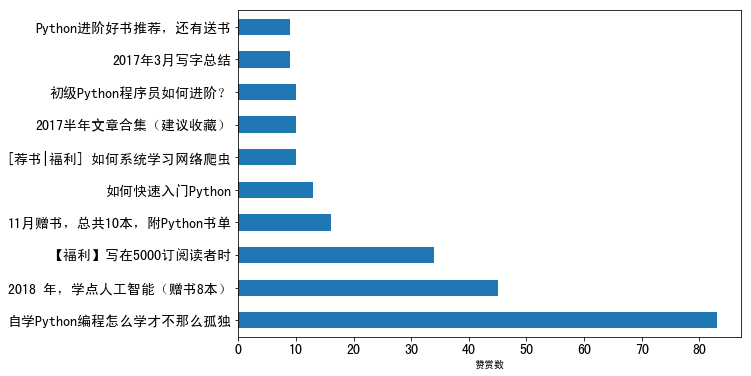

In [38]:
ax = top_reward_num.plot(x='title',
                         y='reward_num', 
                         kind='barh', 
                         figsize=(9,6),
                         fontsize=14)
ax.set_ylabel("")
ax.set_xlabel("赞赏数")
ax.legend().set_visible(False)

101

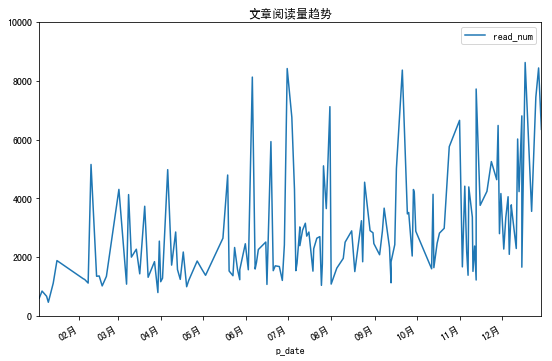

In [106]:
# 最近一年的阅读趋势
import matplotlib.dates as mdates


ax = df[(df['p_date']>=datetime.date(2017,1,1)) & (df['p_date']<datetime.date(2018,1,1))].plot(y='read_num',
                                   x='p_date', 
                                   title="文章阅读量趋势",
                                   yticks=range(0, 11000, 2000),
                                   figsize=(9,6) 
                                   )
ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m月'))



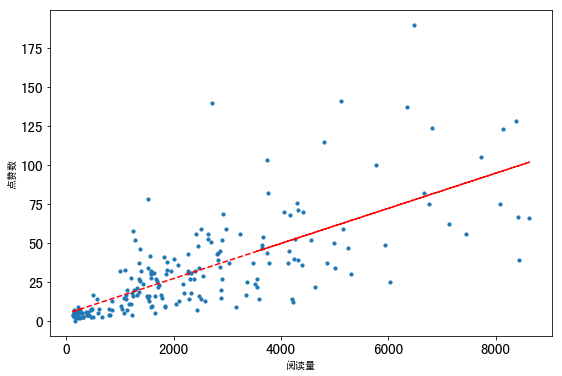

In [42]:
# 散点图
ax = df.plot(kind="scatter", y='like_num', x='read_num',s=10, figsize=(9,6), fontsize=15)
ax.set_xlabel("阅读量")
ax.set_ylabel("点赞数")

z = np.polyfit(df.read_num, df.like_num, 1)
p = np.poly1d(z)
plt.plot(df.read_num,p(df.read_num),"r--")

Text(0,0.5,'赞赏数')

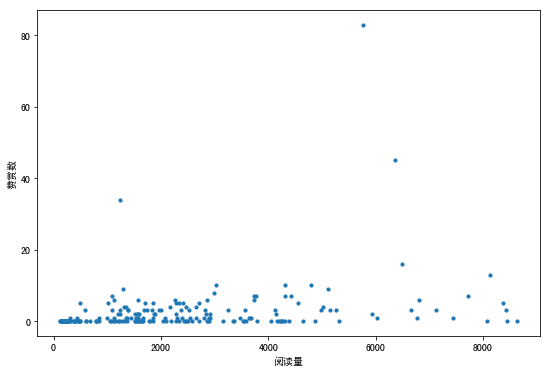

In [175]:
ax =df.plot(kind="scatter", y='reward_num', x='read_num',s=10, figsize=(9,6))
ax.set_xlabel("阅读量")
ax.set_ylabel("赞赏数")


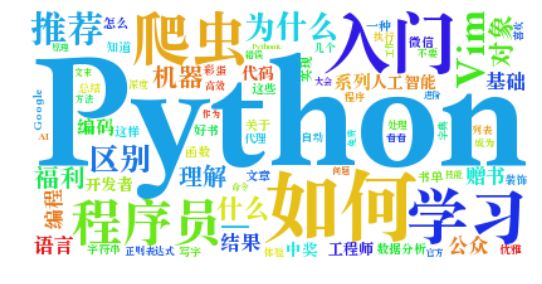

In [83]:
from wordcloud import WordCloud
import jieba

words = []
for i in  df.title:
    seg_list = jieba.cut(i, cut_all=False)
    words.append(" ".join(seg_list))
wordcloud = WordCloud(font_path='/Library/Fonts/Songti.ttc',
                      background_color="white", 
                      max_words=80,).generate(" ".join(words))
plt.figure(figsize=(9,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()